In [4]:
import h5py
import random
import numpy as np
from matplotlib.pyplot import imshow, show, subplot, figure, axis

# PART 1

In [5]:
#read data from .h5 file

filename = "data1.h5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key])

Keys: <KeysViewHDF5 ['data', 'invXForm', 'xForm']>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

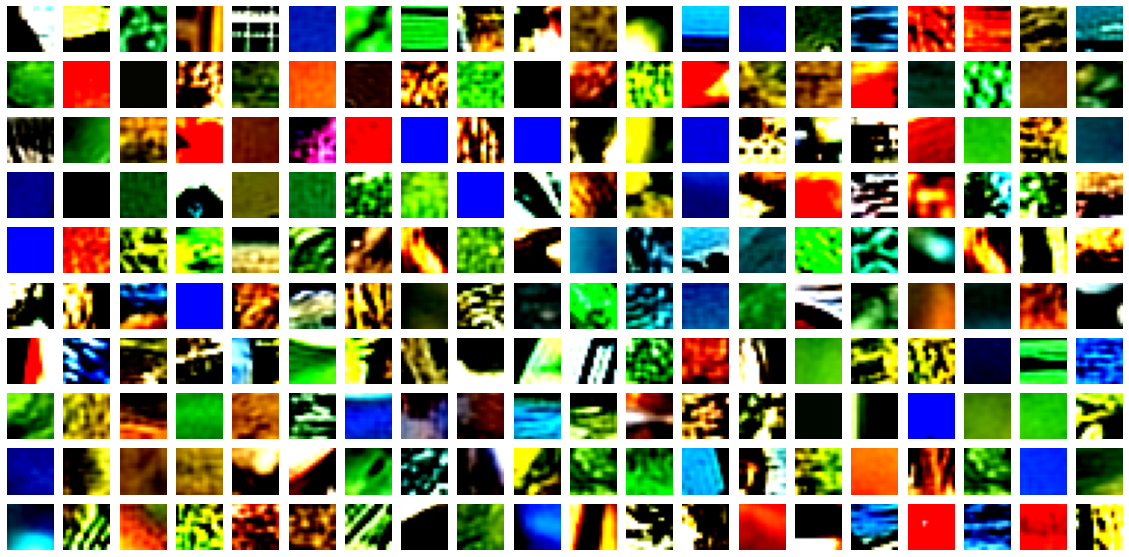

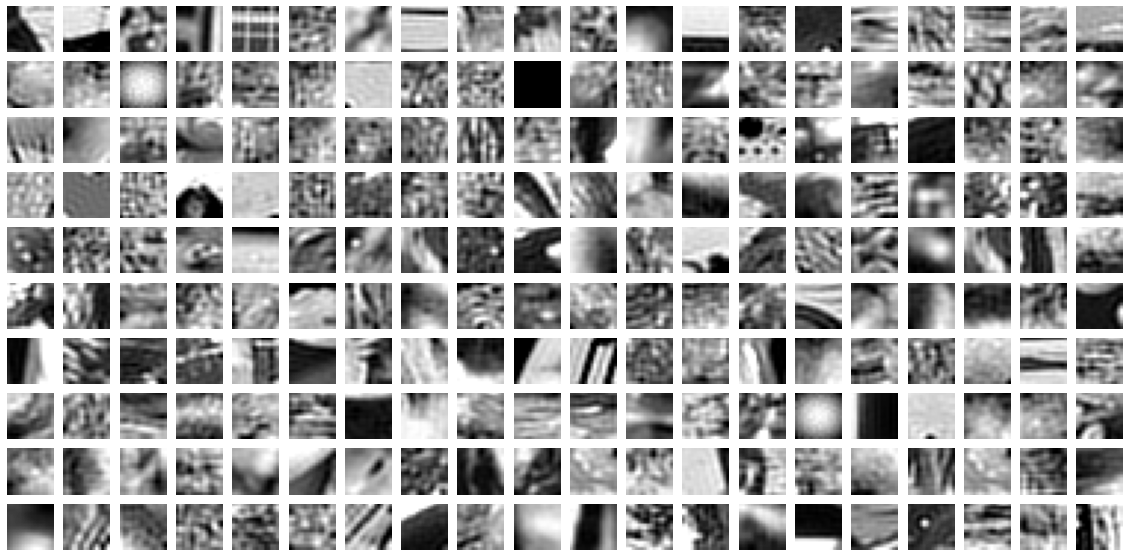

In [41]:
################################## picking random 200 random sample# ################################# 
random_pics = []
for i in range(200):
    index =random.randint(0,10239)
    random_pics.append(index)
    
################################### displaying RGB images ###################################    
rgb_fig = figure(figsize=(20,10))
for i in range(200):
    img=np.transpose(data[random_pics[i]])
    subplot(10, 20, i+1)
    imshow(img)
    axis("off")
show()

################################## displaying normalized gray images ##################################
gray_fig = figure(figsize=(20,10))
data_gray = np.array(data)[:,0,:,:]*0.2126 + np.array(data)[:,1,:,:]*0.7152 + np.array(data)[:,2,:,:]*0.0722
mean = np.mean(data_gray,axis=(1,2)) #find mean
for i in range (len(mean)):
    data_gray[i,:,:] -= mean[i] #remove the mean pixel intensity of each image from itself
std = np.std(data_gray)  # find std
data_gray = np.clip(data_gray, - 3 * std, 3 * std)  # clip -+3 std
#data_gray = normalize(data_gray)  # normalize to 0 - 1
data_gray = 0.1 + data_gray * 0.8  # map to 0.1 - 0.9

for i in range(200):
    img=np.transpose(data_gray[random_pics[i]])
    subplot(10, 20, i+1)
    imshow(img,cmap='gray')
    axis("off")
show()

# PART 2

In [69]:
def initialize_weights(Lin, Lhid):
    """
    Argument:
    Lin -- size of the input layer
    Lhid -- size of the hidden layer
    
    Returns: 
    We that contains
                        W1 -- weight matrix of shape (Lin, Lhid)
                        b1 -- bias vector of shape (1, Lhid)
                        W2 -- weight matrix of shape (Lhid, Lout)
                        b2 -- bias vector of shape (1, Lout)
    """
    Lout = Lin
    We = []
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    
    w0 = np.sqrt(6/(Lin + Lhid))
    
    W1 = np.random.uniform(-w0,w0, size = (Lin,Lhid))
    We.append(W1)
    W2 = np.random.uniform(-w0,w0, size = (Lhid,Lout))
    We.append(W2)
    b1 = np.random.uniform(-w0,w0, size = (1,Lhid))
    We.append(b1)
    b2 = np.random.uniform(-w0,w0, size = (1,Lout))
    We.append(b2)
    
    lamda = 5e-4
    
    params = {  "We": We,
                "b1": b1,
                "W2": W2,
                "b2": b2}
    return We

def initialize_params(Lin, beta, rho):
    
    Lhid = 64
    lmbd = 5e-4
    
    params = {"Lin": Lin,
              "Lhid": Lhid,
              "lambda": lmbd,
              "beta": beta,
              "rho": rho}
    return params